In [1]:
try:
    import pynwb
except ImportError:
    %pip install pynwb
    import pynwb

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pynwb import NWBFile, TimeSeries, NWBHDF5IO

In [3]:
from aind_dynamic_foraging_models.logistic_regression import (
    fit_logistic_regression, MODEL_MAPPER, 
    plot_logistic_regression, exp_func, COLOR_MAPPER
)

import warnings
# Ignore all UserWarnings from hdmf.utils
warnings.filterwarnings("ignore", category=UserWarning, module='hdmf.utils')

### Get example data

Assuming you're in Code Ocean and the data asset `foraging_nwb_bonsai` is attached.

Or, if you're debugging locally, download some sample nwb files to your local computer with the same path.

In Windows, it should be `{the hard drive on which your code resides}:\root\capsule\data\foraging_nwb_bonsai\`.

In [4]:
session_name = '/root/capsule/data/foraging_nwb_bonsai/703548_2024-03-20_10-47-42.nwb'


In [5]:
io = NWBHDF5IO(session_name, mode='r')
nwb = io.read()

In [6]:
df_trial = nwb.trials.to_dataframe()
df_trial[['animal_response', 'rewarded_historyL', 'rewarded_historyR']].head(10)

,animal_response,rewarded_historyL,rewarded_historyR
id,,,
0,1.0,False,False
1,1.0,False,True
2,1.0,False,True
3,1.0,False,False
4,1.0,False,False
5,1.0,False,False
6,1.0,False,False
7,1.0,False,True
8,0.0,True,False


In [7]:
# Turn to 0 and 1 coding (assuming all trials are non-autowater trials)
choice_history = df_trial['animal_response'].values
choice_history[choice_history == 2] = np.nan
reward_history = ((df_trial['rewarded_historyL'] == True) + (df_trial['rewarded_historyR'] == True)).astype(int).values

### Do one fitting

In [8]:
dict_logistic_result = fit_logistic_regression(choice_history, reward_history,
                            logistic_model='Su2022',
                            n_trial_back=15,
                            selected_trial_idx=None,
                            solver='liblinear', 
                            penalty='l2',
                            Cs=10,
                            cv=10,
                            n_jobs_cross_validation=-1,
                            n_bootstrap_iters=1000, 
                            n_bootstrap_samplesize=None,)

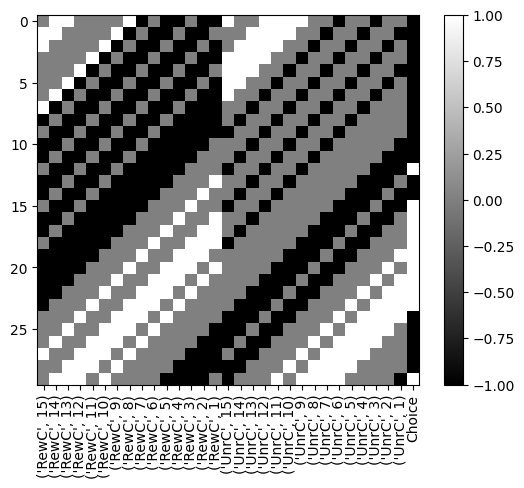

In [9]:
df_design = dict_logistic_result['df_design']

X = df_design.X.to_numpy()
Y = df_design.Y.to_numpy()
trials, var_names = df_design.index, df_design.X.columns

fig, ax = plt.subplots(1,1)
im = ax.imshow(np.concatenate([X[:30,:], Y[:30, :]], axis=1), cmap='gray')
ax.set_xticks(range(len(var_names) + 1))
ax.set_xticklabels(var_names.to_list() + ['Choice'], rotation=90)
fig.colorbar(im)
plt.show()

In [10]:
dict_logistic_result.keys()

dict_keys(['model', 'model_terms', 'n_trial_back', 'df_design', 'X', 'Y', 'df_beta', 'df_beta_exp_fit', 'logistic_reg_cv', 'beta_bootstrap'])

In [11]:
dict_logistic_result['df_beta']

cross_validation  bootstrap_mean  bootstrap_std  \
var  trial_back                                                    
RewC 15                 -0.146186       -0.158640       0.159469   
     14                  0.065598        0.071291       0.171903   
     13                  0.136498        0.136123       0.171283   
     12                 -0.108426       -0.110738       0.167601   
     11                  0.280671        0.293182       0.168249   
     10                  0.297412        0.312329       0.175652   
     9                  -0.048291       -0.053135       0.168655   
     8                   0.000896        0.009605       0.171657   
     7                   0.211107        0.221325       0.174234   
     6                   0.197905        0.209588       0.176335   
     5                   0.396052        0.414585       0.167021   
     4                   0.246317        0.259478       0.166390   
     3                   0.193063        0.210535       0.171911   
     2                   0.430427        0.459630       0.158744   
     1                   1.049212        1.103540       0.157054   
UnrC 15                  0.166719        0.172489       0.164187   
     14                  0.213752        0.220246       0.171566   
     13                  0.150454        0.160980       0.181715   
     12                  0.069872        0.070844       0.176932   
     11                 -0.204016       -0.215194       0.166266   
     10                 -0.094110       -0.094604       0.162072   
     9                   0.164363        0.170132       0.178803   
     8                  -0.087382       -0.093835       0.178382   
     7                   0.333966        0.351735       0.177841   
     6                  -0.104845       -0.112940       0.174972   
     5                  -0.022298       -0.019129       0.184854   
     4                  -0.012063       -0.010525       0.175973   
     3                  -0.117698       -0.120854       0.184417   
     2                   0.015973        0.005213       0.188722   
     1                  -0.244197       -0.255218       0.185504   
bias NaN                 0.143977        0.150986       0.119518   

                 bootstrap_CI_lower  bootstrap_CI_upper  
var  trial_back                                          
RewC 15                   -0.482902            0.138061  
     14                   -0.248636            0.420954  
     13                   -0.196705            0.471284  
     12                   -0.441760            0.214593  
     11                   -0.020524            0.637692  
     10                   -0.020651            0.652584  
     9                    -0.395931            0.269069  
     8                    -0.313431            0.340085  
     7                    -0.109871            0.582042  
     6                    -0.114019            0.583900  
     5                     0.058558            0.735287  
     4                    -0.076336            0.580928  
     3                    -0.141911            0.547822  
     2                     0.164643            0.772282  
     1                     0.798337            1.415608  
UnrC 15                   -0.162165            0.499282  
     14                   -0.109400            0.553697  
     13                   -0.191704            0.518537  
     12                   -0.260595            0.428588  
     11                   -0.544951            0.110155  
     10                   -0.403268            0.230848  
     9                    -0.186490            0.526436  
     8                    -0.460946            0.265334  
     7                     0.011752            0.697146  
     6                    -0.471410            0.218631  
     5                    -0.399929            0.351046  
     4                    -0.367655            0.317587  
     3                    -0.460058            0.246818  
     2                    -0.380

In [12]:
dict_logistic_result['df_beta_exp_fit']

var        amp                      tau               
stat    fitted standard_error    fitted standard_error
RewC  1.292674        0.32109  2.638506       0.758506
UnrC       NaN            NaN       NaN            NaN

<Axes: title={'center': '10-fold CV, score $\\pm$ std = 0.694 $\\pm$ 0.11\\nbest C = 0.359'}, xlabel='Past trials', ylabel='Logistic regression coeffs'>

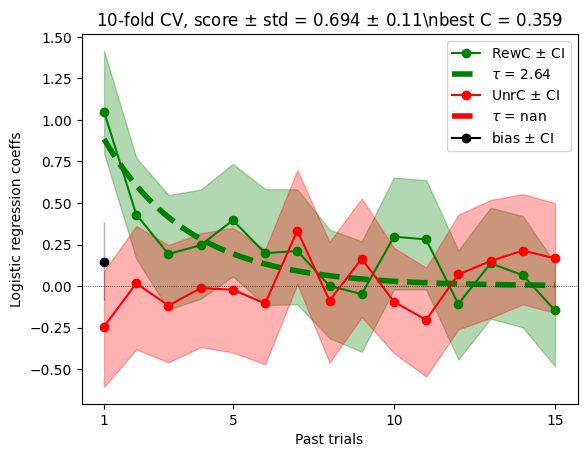

In [13]:
plot_logistic_regression(dict_logistic_result)

## Try a tiny panel project here :)

In [14]:
try:
    import panel
except ImportError:
    %pip install panel jupyter_bokeh holoviews

import glob
import panel as pn

In [15]:
# Get all nwb files from /root/capsule/data/foraging_nwb_bonsai/ using glob
def get_all_nwbs():
    return glob.glob('/root/capsule/data/foraging_nwb_bonsai/*.nwb')

Create a plot function with holoviz (thank you ChatGPT)

In [16]:
import holoviews as hv
pn.extension()
hv.extension('bokeh')

def plot_logistic_regression_holoviz(dict_logistic_result,
                                     ax=None, 
                                    ls='-o',
                                    alpha=0.3,
                                    ):
    # Define empty list to hold plots
    plots = []
    
    # Unpack necessary items from dict_logistic_result
    logistic_reg = dict_logistic_result['logistic_reg_cv']
    df_beta = dict_logistic_result['df_beta']
    df_beta_exp_fit = dict_logistic_result['df_beta_exp_fit']
    
    for var in dict_logistic_result['model_terms']:
        col = COLOR_MAPPER[var]
        
        var_mean = df_beta.loc[var, 'cross_validation']
        trials_back = var_mean.index
        
        if np.all(np.isnan(var_mean)):
            continue
        
        # Create curve for the beta values
        beta_curve = hv.Curve((trials_back, var_mean), label=var + ' ± CI').opts(color=col)
        
        # Add confidence intervals as shaded area if available
        if 'bootstrap_CI_upper' in df_beta.columns:
            var_CI_upper = df_beta.loc[var, 'bootstrap_CI_upper']
            var_CI_lower = df_beta.loc[var, 'bootstrap_CI_lower']
            
            confidence_area = hv.Area((trials_back, var_CI_lower, var_CI_upper), vdims=['y', 'y2']).opts(
                fill_color=col, fill_alpha=alpha)
            beta_curve *= confidence_area
        
        # Add exponential fit if applicable
        if var != 'bias':
            xx = np.linspace(1, trials_back.max(), 100)
            yy = exp_func(xx, *df_beta_exp_fit.loc[var, (slice(None), 'fitted')])
            exp_fit_curve = hv.Curve((xx, yy), label=f"τ = {df_beta_exp_fit.loc[var, ('tau', 'fitted')]:.2f}").opts(
                color=col, line_dash='dashed', line_width=4)
            beta_curve *= exp_fit_curve
        
        plots.append(beta_curve)
        
    # Define the horizontal line at y=0
    hline = hv.HLine(0).opts(color='black', line_dash='dotted', line_width=0.5)
    plots.append(hline)
    
    # Combine all the plots
    final_plot = hv.Overlay(plots).opts(
        title=f'{logistic_reg.cv}-fold CV, score ± std = {np.mean(logistic_reg.scores_[1.0]):.3g} ± {np.std(logistic_reg.scores_[1.0]):.2g}\nbest C = {logistic_reg.C_[0]:.3g}',
        xlabel='Past trials',
        ylabel='Logistic regression coeffs',
        show_legend=True
    ).redim.range(y=(-3, 3))  # Example y-axis range, adjust as necessary
    
    return final_plot

In [17]:
def fit_and_plot_logistic_regression_from_nwb(
    session_name= '/root/capsule/data/foraging_nwb_bonsai/703548_2024-03-20_10-47-42.nwb',
    logistic_model='Su2022',
    n_trial_back=15,
    penalty='l2',
    n_bootstrap_iters=1000,
):
    io = NWBHDF5IO(session_name, mode='r')
    nwb = io.read()
    
    df_trial = nwb.trials.to_dataframe()
    df_trial[['animal_response', 'rewarded_historyL', 'rewarded_historyR']].head(10)
    
    # Turn to 0 and 1 coding (assuming all trials are non-autowater trials)
    choice_history = df_trial['animal_response'].values
    choice_history[choice_history == 2] = np.nan
    reward_history = ((df_trial['rewarded_historyL'] == True) + (df_trial['rewarded_historyR'] == True)).astype(int).values

    dict_logistic_result = fit_logistic_regression(choice_history, reward_history,
                                logistic_model=logistic_model,
                                n_trial_back=n_trial_back,
                                selected_trial_idx=None,
                                solver='liblinear', 
                                penalty=penalty,
                                Cs=10,
                                cv=10,
                                n_jobs_cross_validation=-1,
                                n_bootstrap_iters=n_bootstrap_iters, 
                                n_bootstrap_samplesize=None,)
    ax = plot_logistic_regression_holoviz(dict_logistic_result)
    return ax

In [18]:
file_widget = pn.widgets.Select(options=get_all_nwbs(), name='Select NWB file', width=500, 
                                value='/root/capsule/data/foraging_nwb_bonsai/703548_2024-03-20_10-47-42.nwb')
model_widget = pn.widgets.Select(options=list(MODEL_MAPPER.keys()), name='Select model')
trial_back_widget = pn.widgets.IntSlider(name='Number of trials back', start=1, end=30, value=15)
penalty_widget = pn.widgets.Select(options=['l1', 'l2'], name='Penalty')
n_bootstrap_iters_widget = pn.widgets.IntSlider(name='Number of bootstrap iterations', start=0, end=2000, value=1000, step=100)

logistic_plot = pn.bind(fit_and_plot_logistic_regression_from_nwb,
                        session_name=file_widget,
                        logistic_model=model_widget,
                        n_trial_back=trial_back_widget,
                        penalty=penalty_widget,
                        n_bootstrap_iters=n_bootstrap_iters_widget)

first_app = pn.Column(file_widget, 
                      pn.Row(model_widget, trial_back_widget), 
                      pn.Row(penalty_widget, n_bootstrap_iters_widget),
                      pn.pane.HoloViews(logistic_plot, width=500, height=500, backend='bokeh')
                      )
first_app.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'1c5b8ce5-df23-4283-8055-70c978ff0aa2': {'version…